In [71]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 5]
import seaborn as sns
import numpy as np

In [72]:
sns.set()

In [73]:
entradas = ["compilador.log", "matriz.log", "compressor.log", "simulador.log"]
algoritmos = ["lru", "nru", "segunda_chance"]
pagina = [2, 4, 8, 16, 32, 64]
memoria = [4, 8, 16, 32, 64, 128, 256]

In [82]:
dicionario = {}

for e in entradas:
    dicionario[e] = {}
    
    for a in algoritmos:
        dicionario[e][a] = [[], pagina, [], memoria]

In [83]:
for e in entradas:
    for a in algoritmos:
        for p in pagina:

            datain = open("pg"+str(p)+"_"+a+"_"+e)
            line = datain.readline()
            line = line.split(' ')
            dicionario[e][a][0].append(100*(int(line[2])/(int(line[2])+int(line[3]))))
            datain.close()
            
        for m in memoria:
            
            datain = open("mem"+str(m)+"_"+a+"_"+e)
            line = datain.readline()
            line = line.split(' ')
            line = line[0:7]
            dicionario[e][a][2].append(100*(int(line[2])/(int(line[2])+int(line[3]))))
            datain.close()
                          

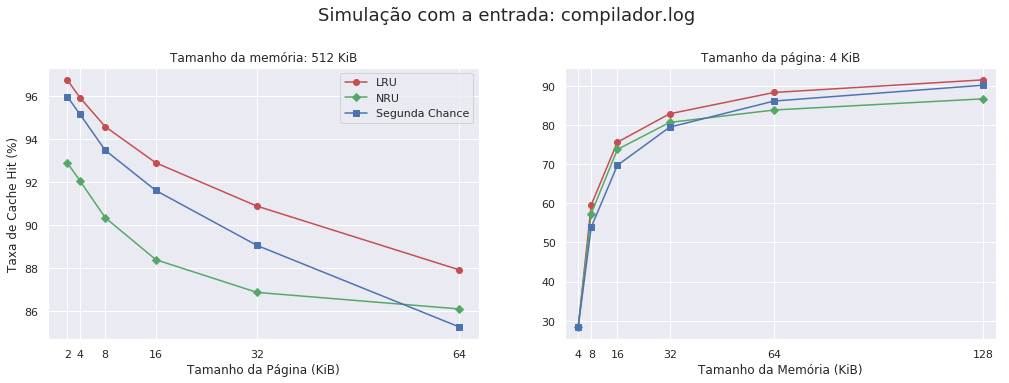

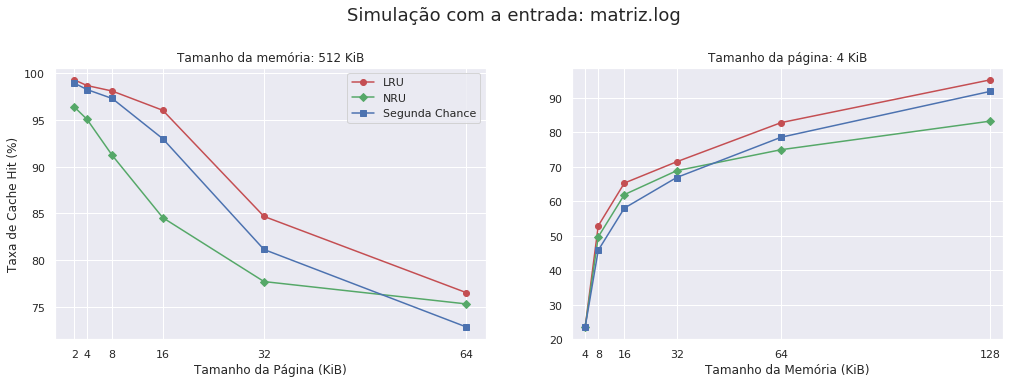

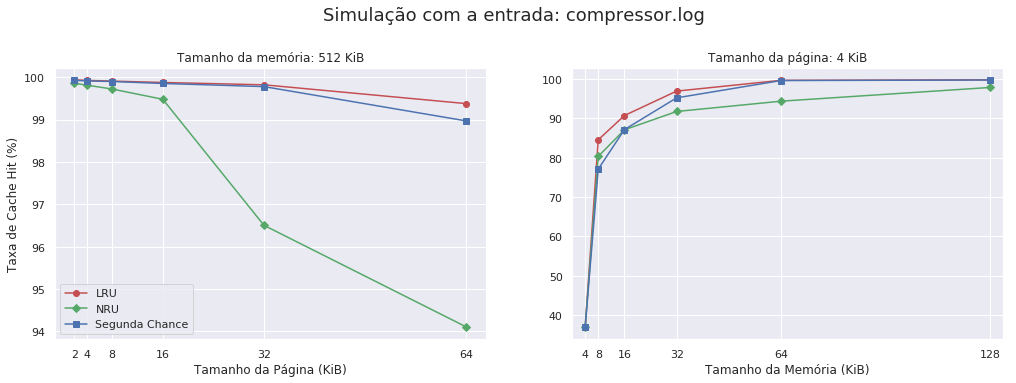

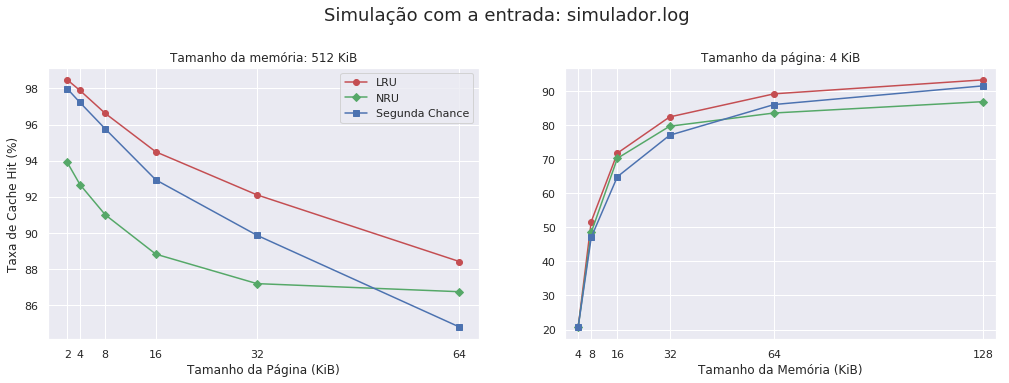

In [85]:
for e in entradas:
    
    
    plt.subplot("121")
    #plt.xlim(0, 70)
    plt.ylabel('Taxa de Cache Hit (%)')
    plt.title("Tamanho da memória: 512 KiB")
    plt.plot(dicionario[e]['lru'][1], dicionario[e]['lru'][0], '-ro', dicionario[e]['nru'][1], dicionario[e]['nru'][0], '-gD', dicionario[e]['segunda_chance'][1], dicionario[e]['segunda_chance'][0], '-bs')
    plt.xlabel('Tamanho da Página (KiB)')
    plt.legend(['LRU','NRU','Segunda Chance'])
    

    x = np.array(pagina)
    my_xticks = ['2', '4', '8', '16', '32', '64']
    plt.xticks(x, my_xticks)
    
    plt.subplot("122")
    plt.xlim(0, 132)
    plt.title("Tamanho da página: 4 KiB")
    plt.plot(dicionario[e]['lru'][3], dicionario[e]['lru'][2], '-ro', dicionario[e]['nru'][3], dicionario[e]['nru'][2], '-gD', dicionario[e]['segunda_chance'][3], dicionario[e]['segunda_chance'][2], '-bs')
    plt.xlabel("Tamanho da Memória (KiB)")
    
    x = np.array(memoria[0:6])
    my_xticks = memoria[0:6]
    plt.xticks(x, my_xticks)
    
    
    plt.suptitle("Simulação com a entrada: " + e, y=1.05, fontsize=18)
    #plt.legend((line1, line2, line3), ('lru', 'nru', 'segunda chance'))
    plt.show()
    #plt.figure().savefig('../Plots/'+e.replace(".log", "")+".svg")